In [17]:
from ipykernel.comm import Comm
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Stolen from cartoframes
def safe_quotes(text, escape_single_quotes=False):
    """htmlify string"""
    if isinstance(text, str):
        safe_text = text.replace('"', "&quot;")
        if escape_single_quotes:
            safe_text = safe_text.replace("'", "&#92;'")
        return safe_text.replace('True', 'true')
    return text

class ColorWidget:
    def __init__(self):
        self.image = None

    def _repr_html_(self):
        html = '''
            <canvas id="canvas"></canvas>
            <script>
                comm = window.parent.Jupyter.notebook.kernel.comm_manager.new_comm('my_comm_target')
                const canvas =  document.getElementById('canvas');
                
                canvas.addEventListener('click', function() {
                    const imageUrl = canvas.toDataURL('image/png');
                    comm.send('https://matplotlib.org/_images/image_demo3.png');
                })
                
                comm.on_msg(function(msg) {
                    console.log('!!! on_msg', msg.content.data);
                });
            </script>
        '''
        
        return f'<iframe srcdoc="{safe_quotes(html)}" width=400 height=400></iframe>'

def target_func(comm, msg):
    @comm.on_msg
    def _recv(msg):
        display(msg['content']['data'])
        comm.send(msg['content']['data'])
        fig, ax = plt.subplots()
        image = plt.imread(msg['content']['data'])
        ax.imshow(image)
        ax.axis('off')
        plt.show()

get_ipython().kernel.comm_manager.register_target('my_comm_target', target_func)

wait(
    sobreescribir
)

color_widget = ColorWidget()
color_widget

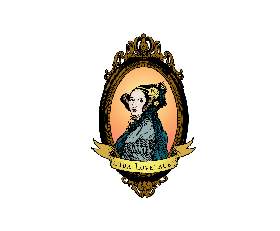

In [13]:
import matplotlib.pyplot as plt

image_file = 'https://matplotlib.org/_images/image_demo3.png'
image = plt.imread(image_file)

fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off')  # clear x- and y-axes
plt.show()

In [5]:
from IPython.display import clear_output

for i in range(10):
    print("Hello World!")

Hello World!
Hello World!
Hello World!
Hello World!
Hello World!
Hello World!
Hello World!
Hello World!
Hello World!
Hello World!
